# Assignment 1
## Basic Hebbian Learning

In [17]:
import numpy as np
from matplotlib import pyplot as plt

---
## [To load the required output]

In [28]:
#w_hist = np.load('Hebbian_weight_vector.npy')

---

1. Load the dataset and normalize it

In [19]:
uu = np.loadtxt("../dataset2_lab_2_1.csv", delimiter=",", unpack=True)
#print(uu)

In [20]:
#normalize the dataset

uu[:,0] = uu[:,0]- np.mean(uu[:,0])
uu[:,0] = uu[:,0]/np.std(uu[:,0])

uu[:,1] = uu[:,1]- np.mean(uu[:,1])
uu[:,1] = uu[:,1]/np.std(uu[:,1])

u = uu

2. Implement a linear firing rate model

In [21]:
def linear_model(u,w):
    return np.dot(u,w)

3. Implement Basic Hebb Rule

In [22]:
name = 'Basic Hebbian Rule'
#randomly initialized weight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 1000

#to keep track of evolution of w during training
w_hist = w
wold = w


for N in range (epochs):


    if N % (epochs/10) == 0: #to print epochs multiple of 100
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Hebbian rule
        w = w + eta*v*uu[i]

        w_hist = np.vstack((w_hist, w))

    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    if np.linalg.norm(w) > 1e50:
       print(f"Stopped at epoch {N} to prevent overflow")
       break
    wold = w

print('Training finished')

Epoch 0 of 1000
Stopped at epoch 20 to prevent overflow
Training finished


In [23]:
#save the evolution of the weight vector into a variable:
np.save('Hebbian_weight_vector',w_hist)

Make plot (P2), plotting:
 - the evolution in time of the two components of the weight vector w
 - the evolution in time of the norm of the weight vector


8527
8527


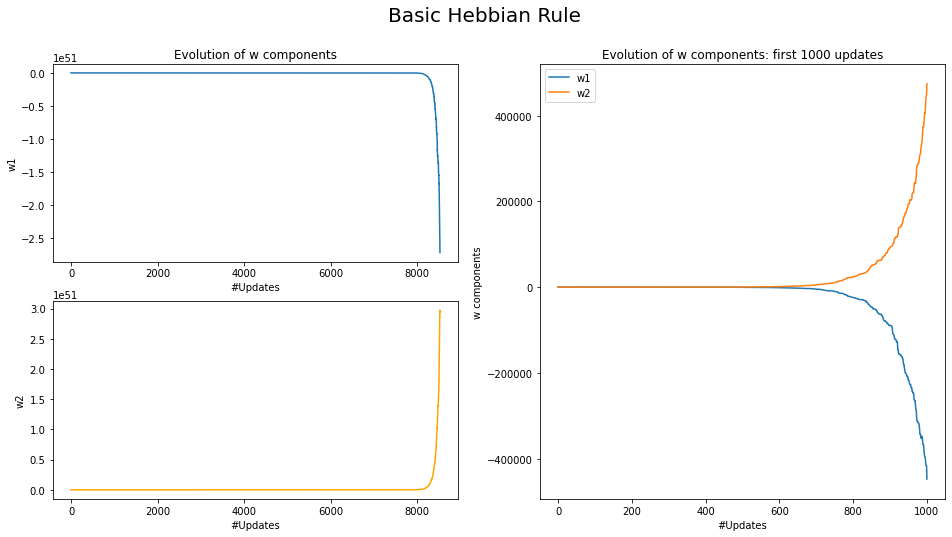

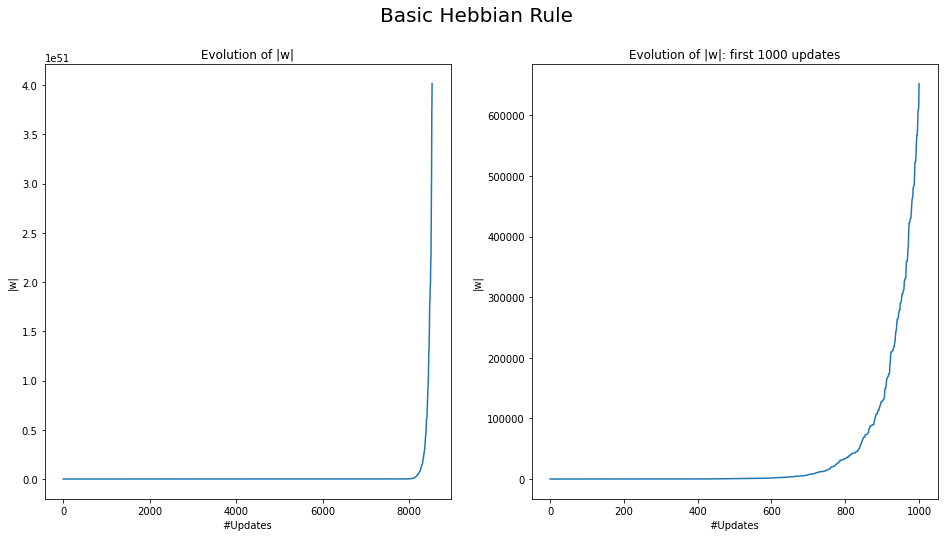

In [24]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)


ax0 = plt.subplot(2,2,1)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
ax0.set_xlabel('#Updates')
ax0.set_ylabel('w1')
ax1 = plt.subplot(2,2,3)
plt.plot(t,w2, label='w2', color = 'orange')
ax1.set_xlabel('#Updates')
ax1.set_ylabel('w2')

ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of w components: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w1[mask], label='w1')
plt.plot(t[mask], w2[mask], label='w2')
plt.legend()
ax2.set_xlabel('#Updates')
ax2.set_ylabel('w components')

plt.savefig('P2' + name + '_w_evolution',format='pdf')


plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
ax1 = plt.subplot(1,2,1)
plt.title('Evolution of |w|')
ax1.set_ylabel('|w|')
ax1.set_xlabel('#Updates')
plt.plot(t, w_norm)



print(len(w_norm))
print(len(t))
ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of |w|: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w_norm[mask])
ax2.set_ylabel('|w|')
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_w_norm_evolution',format='pdf')


plt.show()

- We see that this rule is not stable, as we have an unbounded growth of |w|.


Compute correlation matrix, and its principal eigenvector

In [25]:
Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])
Q = Q/len(u)

print('Correlation matrix:\n',Q)

#Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Q)

#Principal eigenvector
max_eigvect = eig_vec[:,np.argmax(np.abs(eig_val))]
print('\nMax eigvect:\n',max_eigvect)

Correlation matrix:
 [[ 1.         -0.43008581]
 [-0.43008581  1.        ]]

Max eigvect:
 [ 0.70710678 -0.70710678]


Make plot (P1), displaying:
 - the training data points
 - the final weight vector w resulting from the learning process
 - the principal eigenvector of input correlation matrix Q


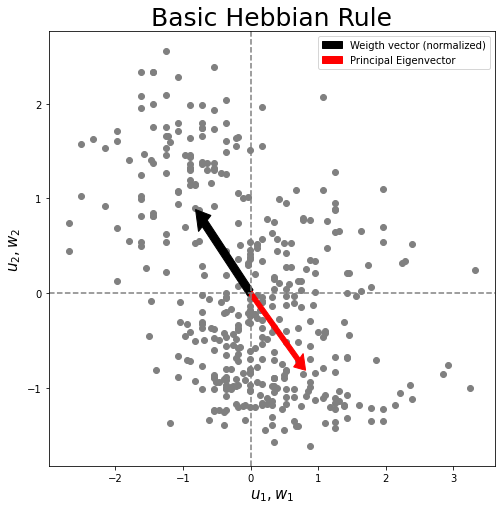

In [26]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
plt.axhline(y=0, color='grey', linestyle = '--')
plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(0,0, w[0]/np.linalg.norm(w), w[1]/np.linalg.norm(w) , width=0.1, head_width=0.25, head_length=0.2, label='Weigth vector (normalized)', color = 'black')

#principal eigenvector
plt.arrow(0,0, max_eigvect[0], max_eigvect[1] , width=0.06, head_width=0.2, head_length=0.15, label='Principal Eigenvector', color = 'red')

plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()

We see, as espected, that the final weight vector is parallel to the principal eigenvector of the correlation matrix.